# Power Consumption Analysis System

## Import the required Libraries

In [66]:

import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")
sns.set()
plt.style.use('ggplot')
%matplotlib inline

## Reading the Dataset

In [ ]:
dataset = pd.read_csv(
    'household_power_consumption.txt.zip', 
    sep = ';'), 
    parse_dates = {'datetime' : ['Date', 'Time']},
    infer_datetime_format = True, 
    na_values = ['nan','?'],
    index_col = 'datetime'
)

In [ ]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
dataset.tail()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


## Data Visualization Before handling Null Values

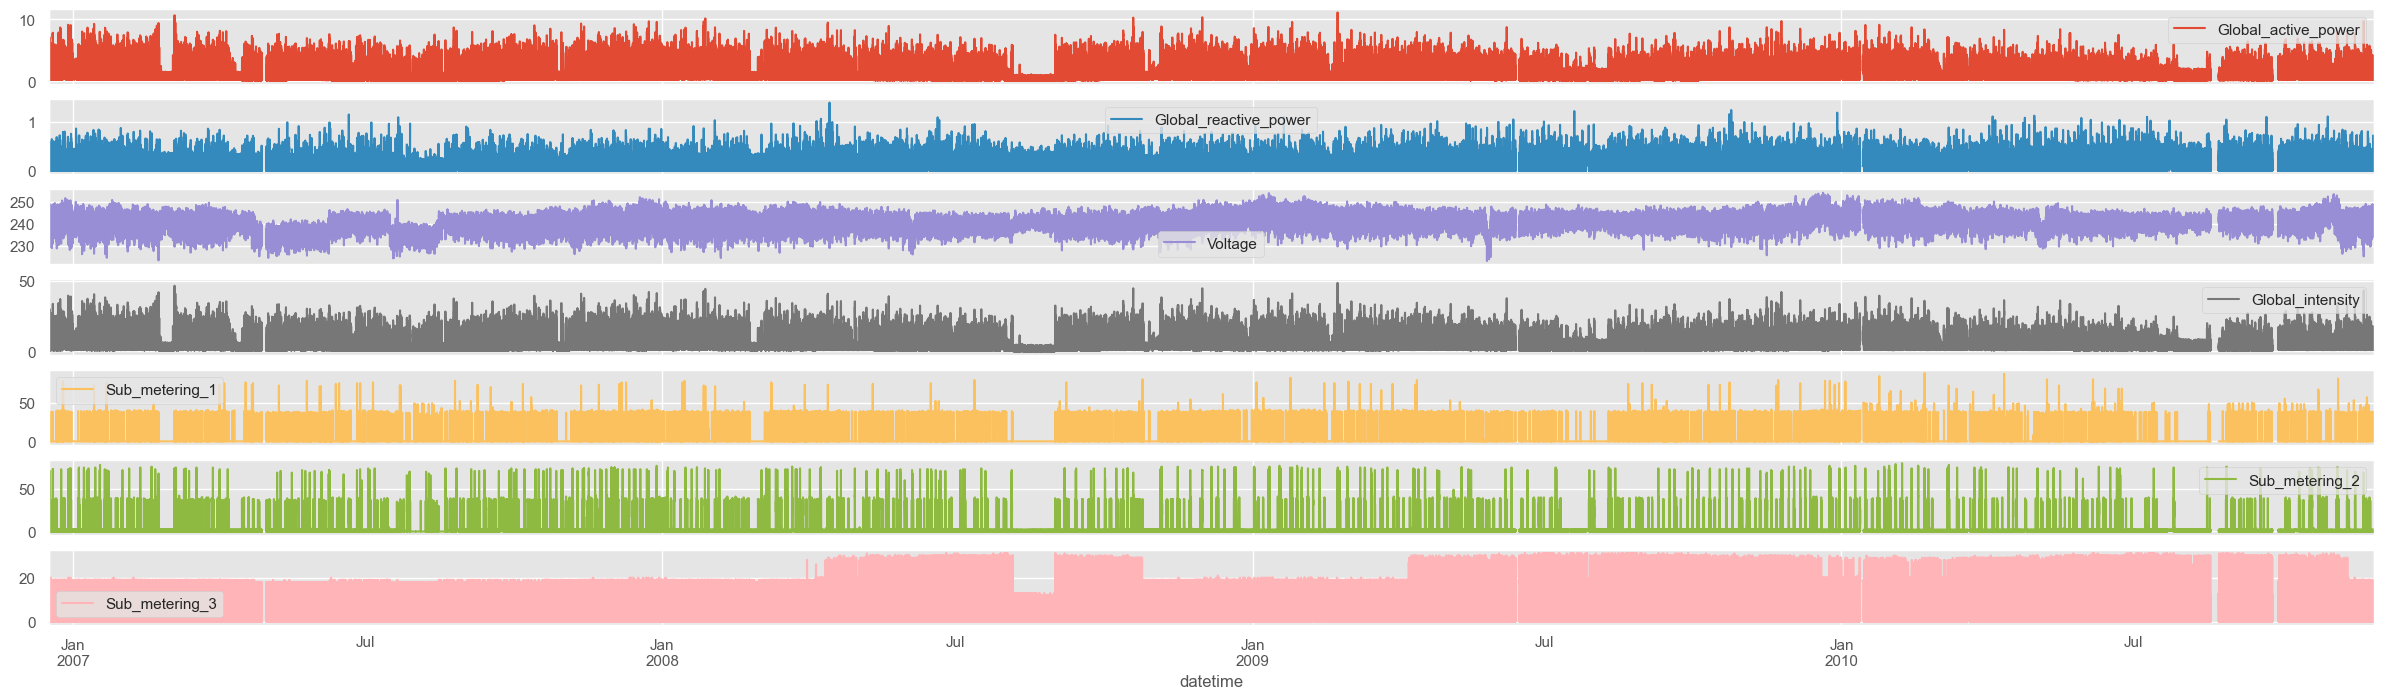

In [ ]:
# Visualization of data
dataset.plot(subplots=True, figsize=(30,8))
plt.show()

## Handling Null Values

In [ ]:
dataset.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
#Handling Missing Values
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.shape

(2075259, 7)

In [ ]:
#Filling all the null values with the mean of their columns
dataset['Global_active_power'].fillna(dataset['Global_active_power'].mean(),inplace=True)
dataset['Global_reactive_power'].fillna(dataset['Global_reactive_power'].mean(),inplace=True)
dataset['Voltage'].fillna(dataset['Voltage'].mean(),inplace=True)
dataset['Global_intensity'].fillna(dataset['Global_intensity'].mean(),inplace=True)
dataset['Sub_metering_1'].fillna(dataset['Sub_metering_1'].mean(),inplace=True)
dataset['Sub_metering_2'].fillna(dataset['Sub_metering_2'].mean(),inplace=True)
dataset['Sub_metering_3'].fillna(dataset['Sub_metering_3'].mean(),inplace=True)

In [ ]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
dataset.shape

(2075259, 7)

In [ ]:
#Adding another sub_metering_4 column to calculate the remiaing Global Intensity
values = dataset.values
dataset['Sub_metering_4'] = (values[:,0] * 1000/60) - (values[:,4] + values[:,5] + values[:,6])

In [ ]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtype: object

## Correlation of dataset values

In [ ]:
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
Sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


In [ ]:
#Descriptive Statistical
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00,9.525726e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


## Dataset Visualization

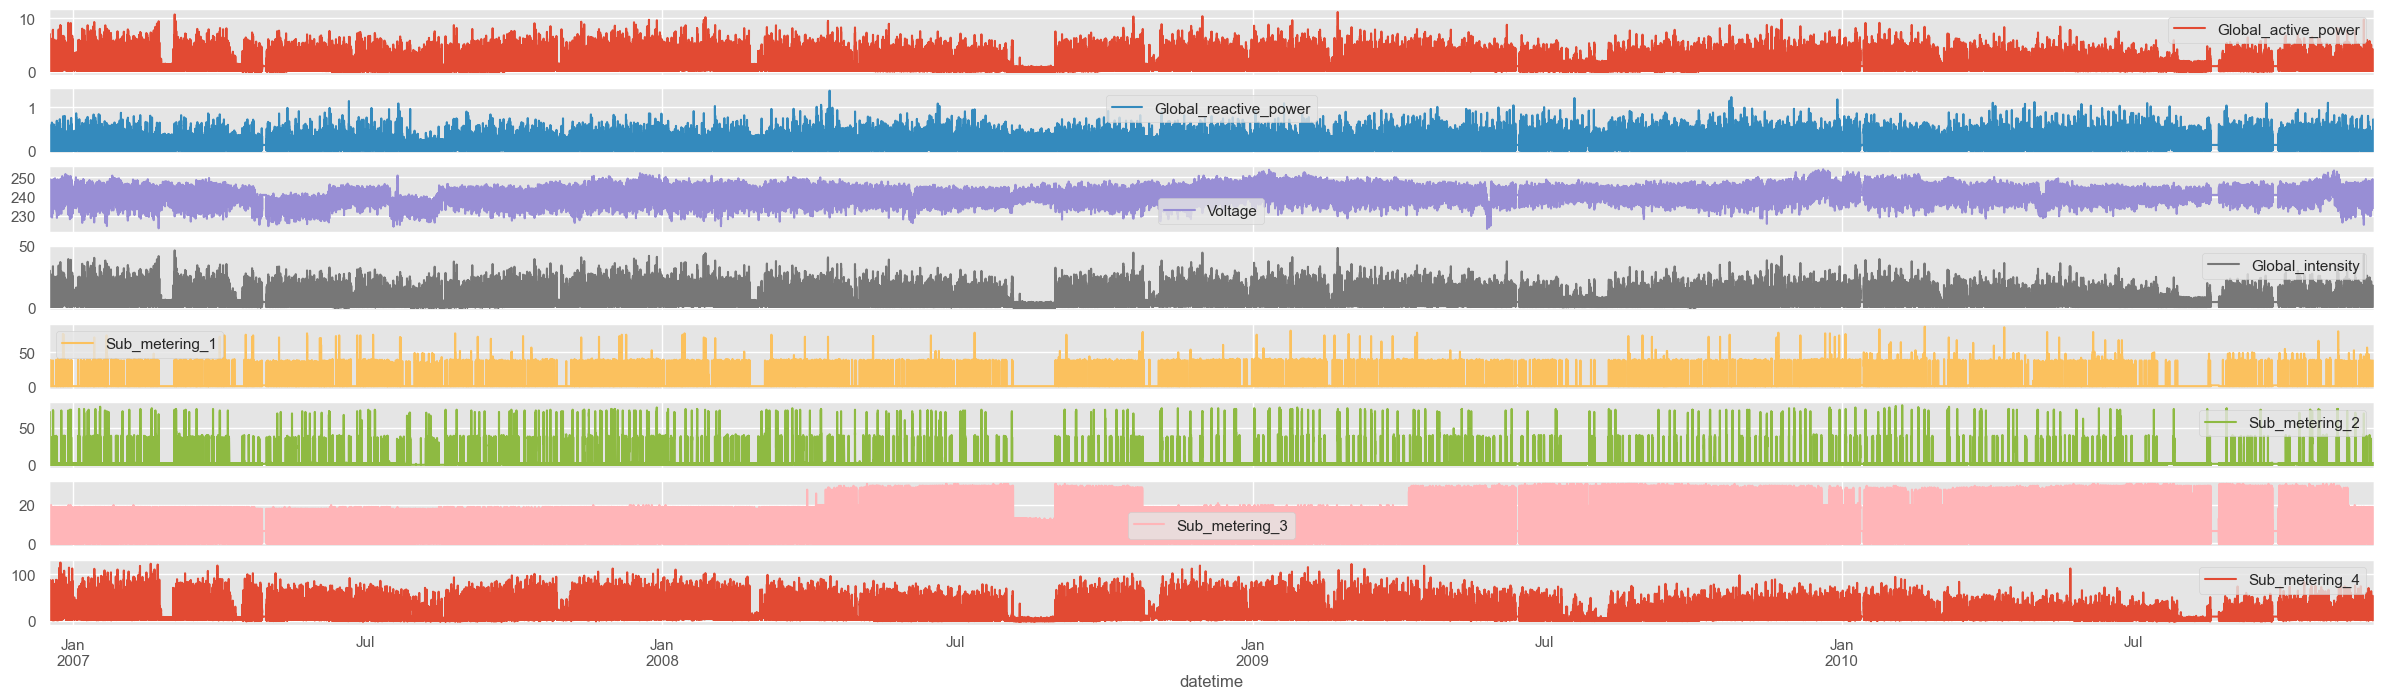

In [18]:
# Visualization data after handling the null values
dataset.plot(subplots=True, figsize=(30,8))
plt.show()

## Univariate Analysis

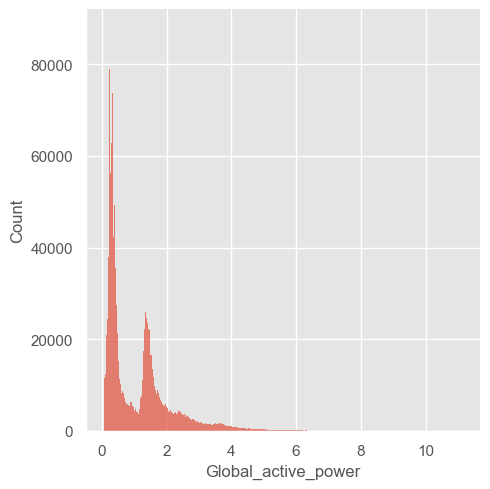

In [19]:
sns.displot(dataset['Global_active_power'])

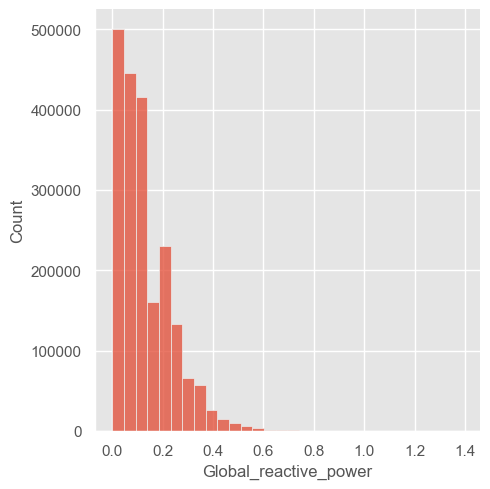

In [20]:
sns.displot(dataset['Global_reactive_power'],kde=False,bins=30)

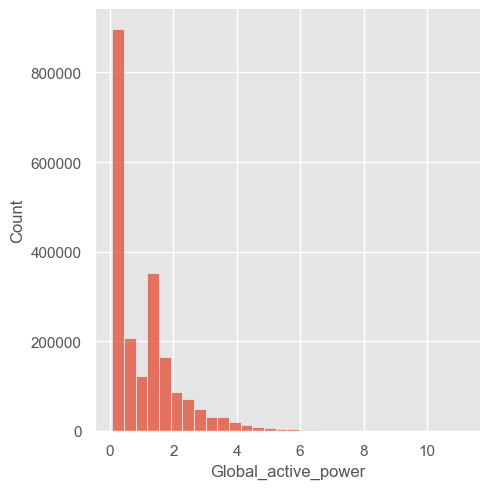

In [21]:
sns.displot(dataset['Global_active_power'],kde=False,bins=30)

## Bivariate Analysis

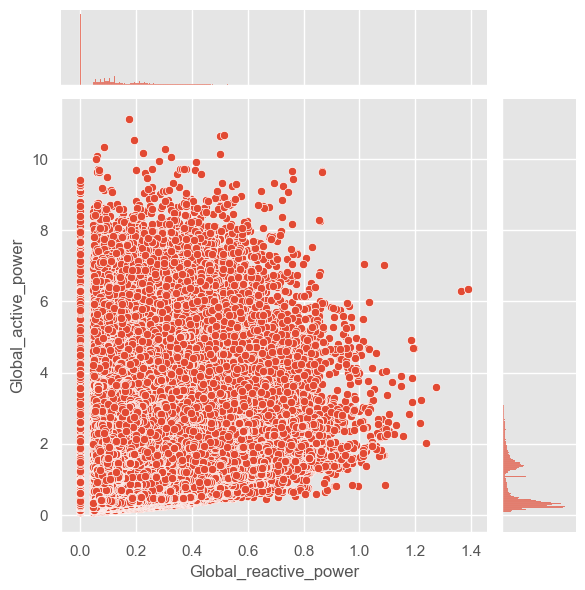

In [22]:
sns.jointplot(x = 'Global_reactive_power', y = 'Global_active_power', data = dataset, kind = 'scatter')

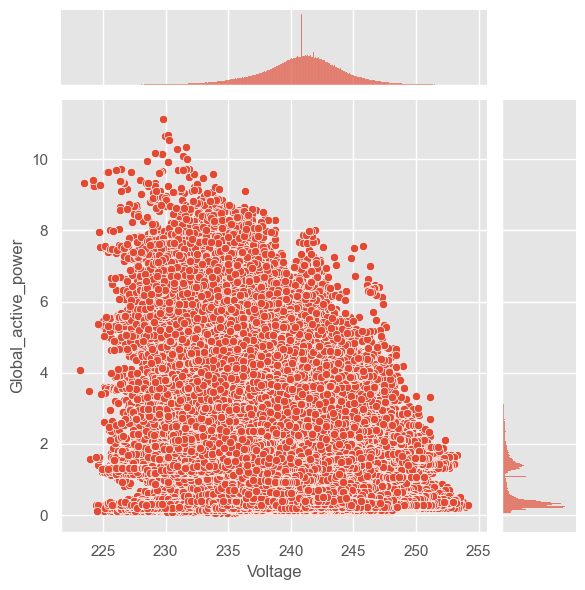

In [23]:
sns.jointplot(x = 'Voltage', y = 'Global_active_power', data = dataset, kind = 'scatter')

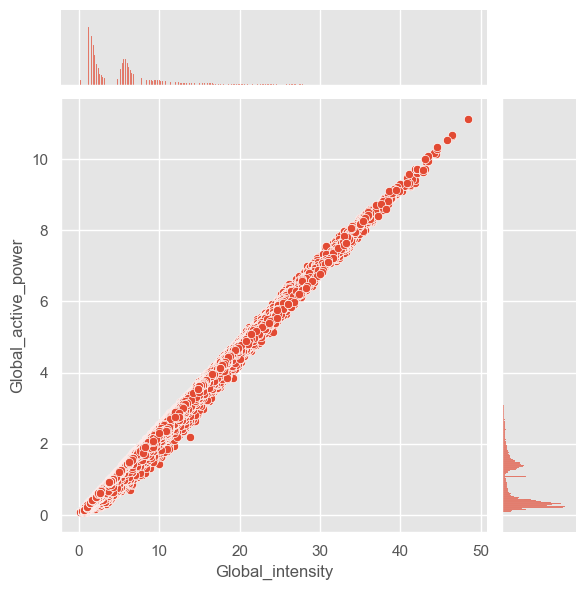

In [24]:
sns.jointplot(x = 'Global_intensity', y = 'Global_active_power', data = dataset, kind = 'scatter')

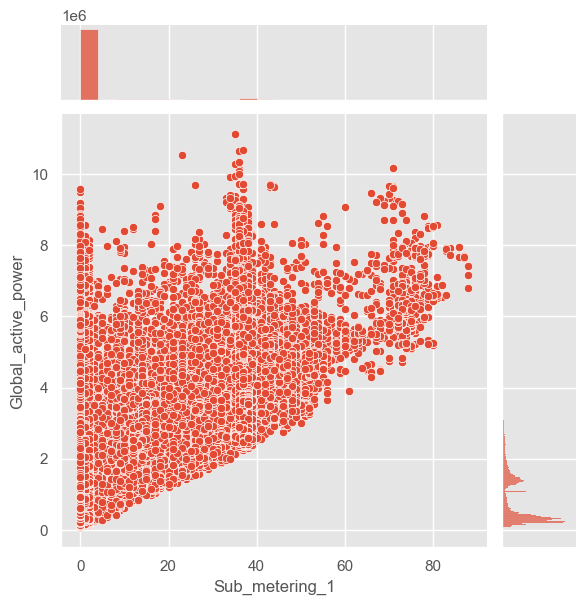

In [25]:
sns.jointplot(x = 'Sub_metering_1', y = 'Global_active_power', data = dataset, kind = 'scatter')

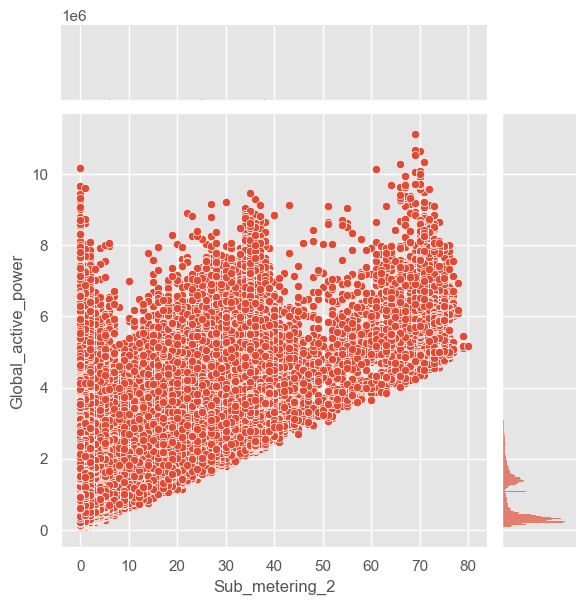

In [26]:
sns.jointplot(x = 'Sub_metering_2', y = 'Global_active_power', data = dataset, kind = 'scatter')

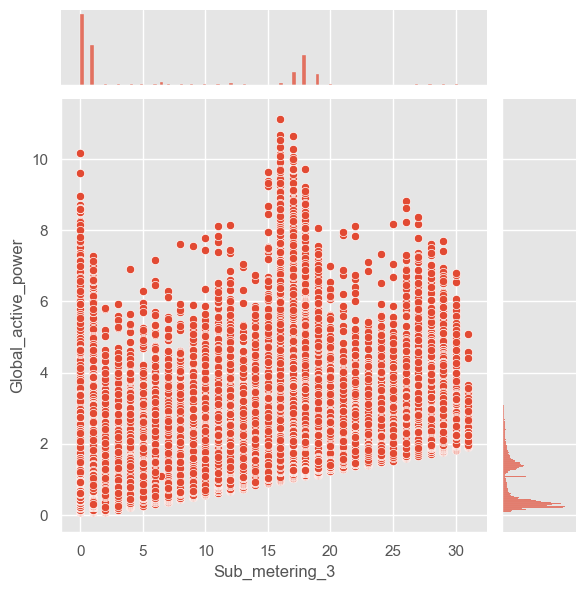

In [27]:
sns.jointplot(x = 'Sub_metering_3', y = 'Global_active_power', data = dataset, kind = 'scatter')

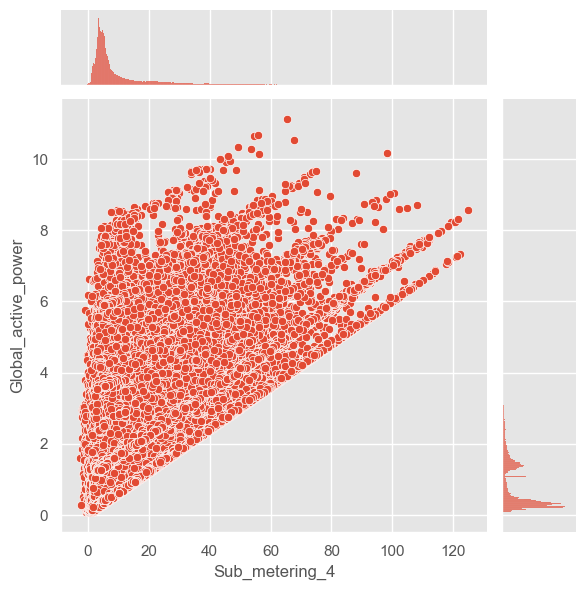

In [28]:
sns.jointplot(x = 'Sub_metering_4', y = 'Global_active_power', data = dataset, kind = 'scatter')

## Multivariate Analysis - HeatMap

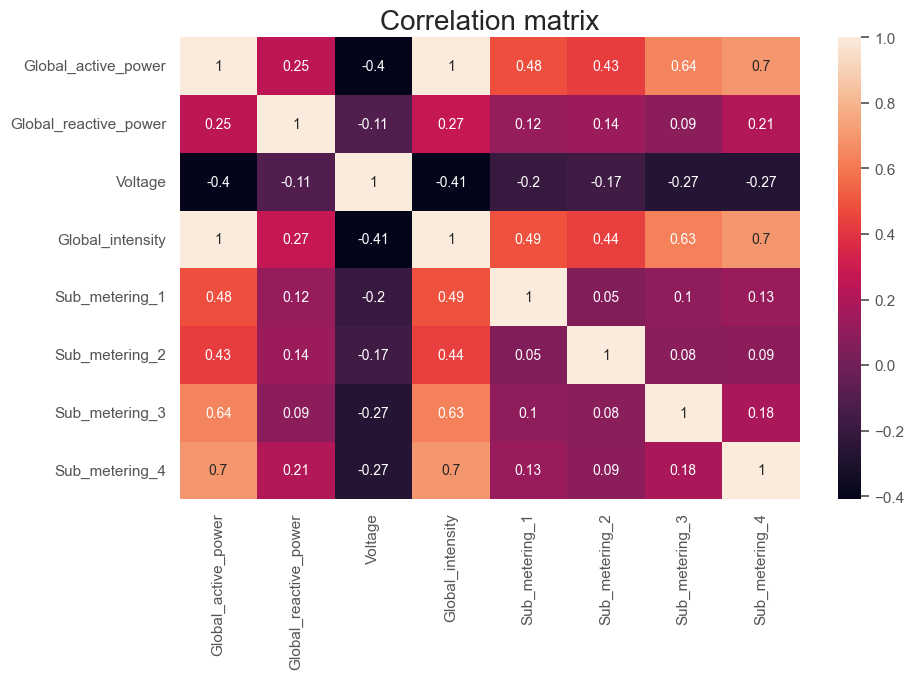

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr().round(2),annot=True)
plt.title('Correlation matrix',fontsize = 20)
plt.show()

## Dividing the dataset

In [30]:
dataset.dropna()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766667
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733333
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333


In [31]:
X = dataset.iloc[:,[1,3,4,5,6]]
y = dataset.iloc[:,0]

In [32]:
X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,
2006-12-16 17:24:00,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,0.528,15.8,0.0,1.0,17.0


In [33]:
y.head()

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [34]:
dataset.dropna()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766667
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733333
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333


In [35]:
#Outlier Observation Analysis

In [36]:
for feature in dataset:
    
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if dataset[(dataset[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Global_active_power yes
Global_reactive_power yes
Voltage yes
Global_intensity yes
Sub_metering_1 yes
Sub_metering_2 yes
Sub_metering_3 no
Sub_metering_4 yes


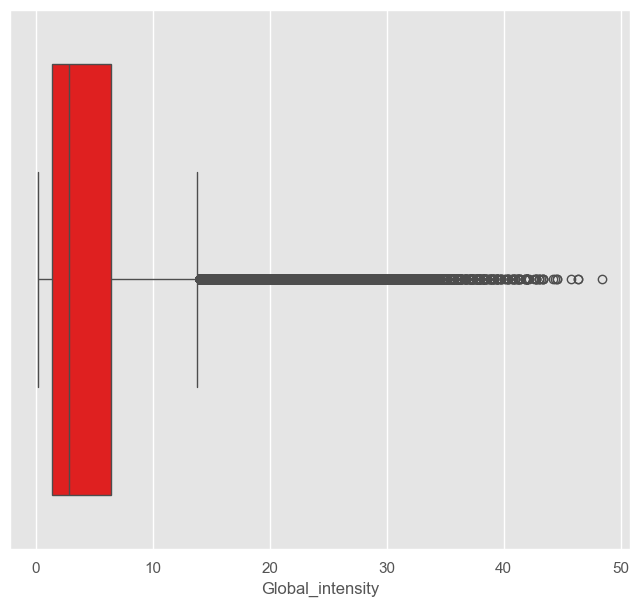

In [37]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = dataset["Global_intensity"], color="red");

In [38]:
Q1 = dataset.Global_intensity.quantile(0.25)
Q3 = dataset.Global_intensity.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
dataset.loc[dataset["Global_intensity"] > upper,"Global_intensity"] = upper

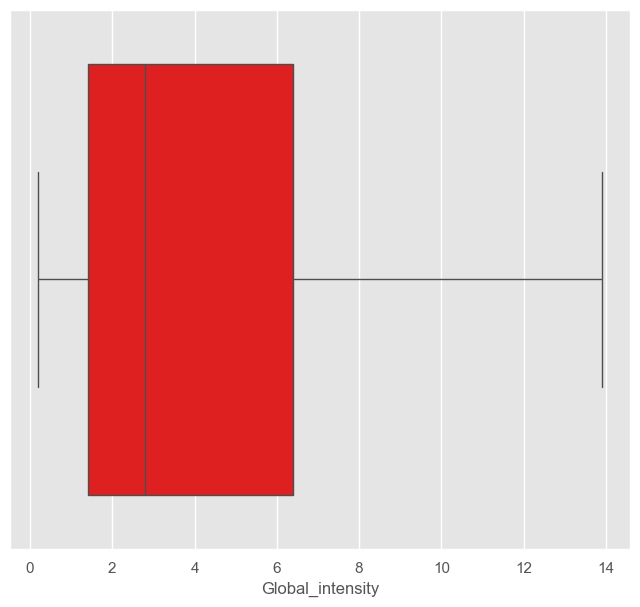

In [39]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = dataset["Global_intensity"], color="red");

In [40]:
dataset.shape

(2075259, 8)

In [41]:
import pandas as pd

# Assuming dataset is loaded from 'household_power_consumption.txt'
# Adjust this if your dataset loading is different
dataset = pd.read_csv('household_power_consumption.txt', 
                    sep=';', 
                    parse_dates={'datetime': ['Date', 'Time']}, 
                    infer_datetime_format=True, 
                    na_values=['nan', '?'],
                    low_memory=False)

# Reset index to get 'datetime' as a column if it was set as index
dataset = dataset.reset_index()
dataset.rename(columns={'datetime': 'Date'}, inplace=True)

# Convert 'Date' to datetime and extract components
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')  # No format needed since parse_dates handled it
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
dataset['Day_of_Week'] = dataset['Date'].dt.day_name()

# Check available columns
print("Columns in dataset:", dataset.columns.tolist())

# One-Hot Encoding
# Only encode columns that exist in the dataset
categorical_columns = ['Energy_Source', 'Region', 'Day_of_Week']
columns_to_encode = [col for col in categorical_columns if col in dataset.columns]

if columns_to_encode:
    dataset_encoded = pd.get_dummies(dataset, columns=columns_to_encode, drop_first=True)
else:
    dataset_encoded = dataset.copy()  # If no categorical columns exist, keep original dataset

# Print the result
print("\nDataFrame after Feature Engineering and One-Hot Encoding:")
print(dataset_encoded.head())

Columns in dataset: ['index', 'Date', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Year', 'Month', 'Day', 'Day_of_Week']

DataFrame after Feature Engineering and One-Hot Encoding:
   index                Date  Global_active_power  Global_reactive_power  \
0      0 2006-12-16 17:24:00                4.216                  0.418   
1      1 2006-12-16 17:25:00                5.360                  0.436   
2      2 2006-12-16 17:26:00                5.374                  0.498   
3      3 2006-12-16 17:27:00                5.388                  0.502   
4      4 2006-12-16 17:28:00                3.666                  0.528   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0   234.84              18.4             0.0             1.0            17.0   
1   233.63              23.0             0.0             1.0            16.0   
2   233.29              23.0      

In [42]:
dataset.head()

,index,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Day_of_Week
0,0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,Saturday
1,1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,Saturday
2,2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,Saturday
3,3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,Saturday
4,4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,Saturday


In [43]:
import pandas as pd

# Sample data as a string (you can replace this with reading from a file)
data = """Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000
17/12/2006;14:16:00;2.118;0.404;244.380;8.800;0.000;0.000;18.000
19/12/2006;08:02:00;3.138;0.212;236.140;13.200;0.000;0.000;17.000"""
from io import StringIO
dataset = pd.read_csv(StringIO(data), sep=';')

dataset['Datetime'] = pd.to_datetime(dataset['Date'] + ' ' + dataset['Time'], format='%d/%m/%Y %H:%M:%S')

# Extract features for one-hot encoding
dataset['DayOfWeek'] = dataset['Datetime'].dt.day_name()  # Day of the week
dataset['Hour'] = dataset['Datetime'].dt.hour  # Hour of the day

# One-hot encode the categorical variables
dataset_one_hot = pd.get_dummies(dataset, columns=['DayOfWeek', 'Hour'], drop_first=True)

# Display the resulting DataFrame
print(dataset_one_hot)

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  17/12/2006  14:16:00                2.118                  0.404   244.38   
3  19/12/2006  08:02:00                3.138                  0.212   236.14   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2               8.8             0.0             0.0            18.0   
3              13.2             0.0             0.0            17.0   

             Datetime  DayOfWeek_Sunday  DayOfWeek_Tuesday  Hour_14  Hour_17  
0 2006-12-16 17:24:00             False              False    False     True  
1 2006-12-16 17:25:00             False              False    False     True  
2 2006

In [44]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,DayOfWeek,Hour
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,Saturday,17
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,Saturday,17
2,17/12/2006,14:16:00,2.118,0.404,244.38,8.8,0.0,0.0,18.0,2006-12-17 14:16:00,Sunday,14
3,19/12/2006,08:02:00,3.138,0.212,236.14,13.2,0.0,0.0,17.0,2006-12-19 08:02:00,Tuesday,8


## Splitting Train and Test Data

In [45]:
import pandas as pd

data = pd.read_csv('household_power_consumption.txt', sep=';')  # Adjust the file path and separator as needed

# Split the dataset
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1452681, 8)
(622578, 8)
(1452681,)
(622578,)


In [48]:
y_train

529398     17.0
1115551    18.0
1934310     NaN
877714      1.0
1810003     1.0
           ... 
963395      1.0
117952      0.0
1484405     1.0
305711      0.0
2034348     1.0
Name: Sub_metering_3, Length: 1452681, dtype: float64

In [49]:
y_train.dropna()

529398     17.0
1115551    18.0
877714      1.0
1810003     1.0
1772421     1.0
           ... 
963395      1.0
117952      0.0
1484405     1.0
305711      0.0
2034348     1.0
Name: Sub_metering_3, Length: 1434444, dtype: float64

## Model Building

### Linear Regression

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

data = dataset.apply(pd.to_numeric, errors='coerce')

print("\nChecking for NaN values in the dataset:")
print(data.isna().sum())

# Check the shape before dropping NaN values
print(f"Shape before dropping NaNs: {data.shape}")

data_cleaned = data.dropna()

# Check the shape after dropping NaN values
print(f"Shape after dropping NaNs: {data_cleaned.shape}")

X = data_cleaned.drop(['Global_active_power'], axis=1)  
y = data_cleaned['Global_active_power']  # Target variable

# Check for finite values and filter
finite_mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
X = X[finite_mask]
y = y[finite_mask]

# Check the shape after filtering for finite values
print(f"Shape after filtering for finite values: X: {X.shape}, y: {y.shape}")

if len(y) == 0:
    print("No valid samples left after filtering. Please check your dataset.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    predictions = lm.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse:.2f}')

    print("Predictions:", predictions)
    print("Actual values:", y_test.values)
   


Checking for NaN values in the dataset:
Date                     4
Time                     4
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
DayOfWeek                4
Hour                     0
dtype: int64
Shape before dropping NaNs: (4, 12)
Shape after dropping NaNs: (0, 12)
Shape after filtering for finite values: X: (0, 11), y: (0,)
No valid samples left after filtering. Please check your dataset.


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


data = pd.read_csv('household_power_consumption.txt', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False)


data = data.apply(pd.to_numeric, errors='coerce')

data_cleaned = data.dropna()

# Step 3: Feature Selection
X = data_cleaned.drop(['Global_active_power'], axis=1) 
y = data_cleaned['Global_active_power']  

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 5: Train the Model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Step 6: Evaluate the Model
predictions = lm.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R² Score: {r2:.2f}')

# Optional: Print coefficients of the model
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)

Mean Squared Error: 1.11
Mean Absolute Error: 0.82
R² Score: 0.00
Coefficients: [-1.2471167e-18  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00]
Intercept: 2.623482625464863


### XGBRegressor

In [52]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Akshat\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [53]:
from xgboost import XGBRegressor

In [54]:
model2 = XGBRegressor()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [55]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

In [56]:
y_pred1


array([1.05357388, 1.10182757, 1.08137585, ..., 1.03732864, 1.11161689,
       1.07838277], shape=(614784,))

### Ridge Regression

In [57]:
model3 = Ridge()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

In [58]:
y_pred3

array([4.95114944, 0.06909101, 2.58238884, ..., 1.35954916, 0.1448487 ,
       1.55032367], shape=(614784,))

## Comparing the models

In [59]:
from sklearn import metrics

### LinearRegression Evaluation

In [60]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('RSqaureValue:',metrics.r2_score(y_test,predictions))

MAE: 0.8173585537450706
MSE: 1.1135348144479589
RMSE: 1.0552415905601706
RSqaureValue: 0.0016777912031636921


### XGBRegressor Evaluation


In [61]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:',metrics.mean_squared_error(y_test,y_pred2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))
print('RSqaureValue:',metrics.r2_score(y_test,y_pred2))

MAE: 0.016762690882506922
MSE: 0.0008607898285822016
RMSE: 0.029339219972286272
RSqaureValue: 0.9992282723523054


### RidgeRegression Evaluation


In [62]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:',metrics.mean_squared_error(y_test,y_pred3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))
print('RSqaureValue:',metrics.r2_score(y_test,y_pred3))

MAE: 0.025902301919310602
MSE: 0.0016520628449920424
RMSE: 0.040645575958424336
RSqaureValue: 0.9985188689144836


## Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lm,X,y,cv=5)

In [64]:
np.mean(cv)

np.float64(-0.005690282169220051)

## Saving the model

In [65]:
import pickle
filename = 'PCASSS_model.pkl'
pickle.dump(lm,open(filename,'wb'))